In [1]:
from statsmodels.datasets import sunspots
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = sunspots.load_pandas().data

In [3]:
data.head()

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0


In [4]:
data.describe()

,YEAR,SUNACTIVITY
count,309.000000,309.000000
mean,1854.000000,49.752104
std,89.344838,40.452595
min,1700.000000,0.000000
25%,1777.000000,16.000000
50%,1854.000000,40.000000
75%,1931.000000,69.800000
max,2008.000000,190.200000


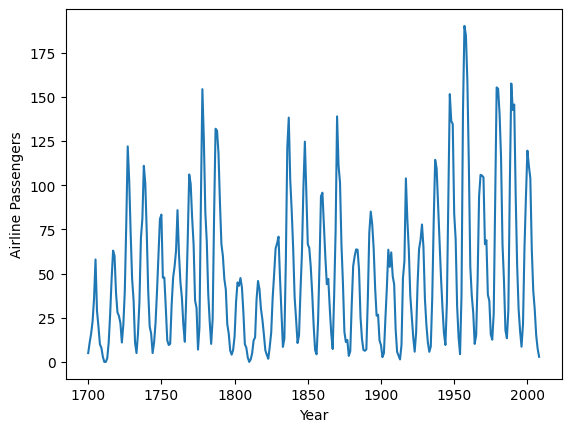

In [5]:
plt.plot(data["YEAR"], data["SUNACTIVITY"])
plt.xlabel("Year")
plt.ylabel("Airline Passengers")
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaler.fit(data[["SUNACTIVITY"]])

StandardScaler()

In [9]:
data = data.assign(
    Value = scaler.transform(data[["SUNACTIVITY"]])
)

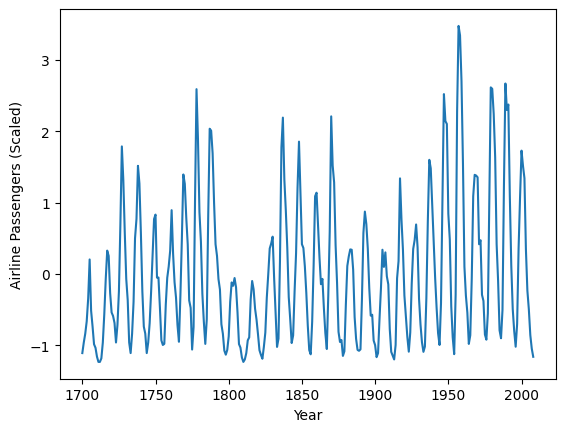

In [10]:
plt.plot(data["YEAR"], data["Value"])
plt.xlabel("Year")
plt.ylabel("Airline Passengers (Scaled)")
plt.show()